In [51]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q seaborn
import seaborn as sns

In [ ]:
csv_file_path = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250519_142700_machine_learning_human/Homo_sapiens/feature_matrix_with_go_terms.csv'
output_file = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250519_142700_machine_learning_human/Homo_sapiens/'
csv_file_path_all_organisms = '/home/abalzer/Documents/github_clone/bachelor_thesis/pipeline/output/output_20250603_145910_ml_all_organisms/Homo_sapiens/feature_matrix_with_go_terms.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path_all_organisms)

In [53]:
print(df.head(0))

Empty DataFrame
Columns: [protein_id, protein_id_human, MPP_cleavage_position, mitofates_cleavage_probability, tom20_motive, Second_AA_A, Second_AA_C, Second_AA_D, Second_AA_E, Second_AA_F, Second_AA_G, Second_AA_H, Second_AA_I, Second_AA_K, Second_AA_L, Second_AA_M, Second_AA_N, Second_AA_P, Second_AA_Q, Second_AA_R, Second_AA_S, Second_AA_T, Second_AA_V, Second_AA_W, Second_AA_Y, Hydrophobic Moment, start_of_alpha_helix, length_of_alpha_helix, Electrostatic Help, Discrimination Factor, helix_score, Sequence, Molecular Weight, Leucine_and_Alanine_percentage, Arginine_percentage, Aromaticity, Instability Index, Isoelectric Point, SecStr_Helix, SecStr_Sheet, Hydrophobicity, GO_Term]
Index: []

[0 rows x 42 columns]


In [ ]:
df_copy = df.copy()
second_aa_columns = [col for col in df_copy.columns if col.startswith("Second_AA_")]
df_copy["Second_AA"] = df_copy[second_aa_columns].idxmax(axis=1).str.replace("Second_AA_", "")
df_copy = df_copy.drop(columns=second_aa_columns)
natA = {'A', 'S', 'T', 'V', 'C', 'G'}
natC = {'L', 'I', 'F', 'W'}
natB = {'D', 'E', 'N', 'Q'}
# Add a column for nat type based on Second_AA
def get_nat_type(aa):
    if aa in natA:
        return 'natA'
    elif aa in natC:
        return 'natC'
    elif aa in natB:
        return 'natB'
    else:
        return 'natX'  # Unknown or other types

df['Nat_Type'] = df['Second_AA'].apply(get_nat_type)
mito_df = df[(df['GO_Term'] == "GO:0005739")]
er_df = df[(df['GO_Term'] == 'GO:0005783')]
cyto_df = df[(df['GO_Term'] == 'cyto_nuclear')]
multiple = df[(df['GO_Term'] == 'Multiple')]

er_df['NAT_Type'] = er_df[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)
er_df['NAT_Type'] = 'ER'
cyto_df['NAT_Type'] = cyto_df[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)
cyto_df['NAT_Type'] = 'cyto_nuclear'
multiple['NAT_Type'] = cyto_df[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)
multiple['NAT_Type'] = 'multiple'

NAT_NatAD = mito_df['NAT_NatA/D']
NAT_NatB = mito_df['NAT_NatB']
NAT_NatCE = mito_df['NAT_NatC/E']
NAT_Other = mito_df['NAT_Other']
# Combine the four NAT columns into a single column
mito_df['NAT_Type'] = mito_df[['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other']].idxmax(axis=1)

# Combine mito_df and not_mito_proteins for plotting
combined_df = pd.concat([mito_df, er_df, cyto_df, multiple], ignore_index=True)

# Create a new dataframe with the NAT_Type column
nat_df = combined_df[['protein_id', 'Hydrophobic Moment', 'Electrostatic Help', 'GO_Term']].copy()
# Group by NAT_Type and calculate the mean for Hydrophobic_Moment and Electrostatic_Help
nat_means = nat_df.groupby('GO_Term')[['Hydrophobic Moment', 'Electrostatic Help']].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a violin plot for Hydrophobic Moment
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
ax1.set_xlabel('GO Term')
ax1.set_ylabel('Hydrophobic Moment')
ax1.set_title('Hydrophobic Moment Distribution per NAT Type')

# Create a violin plot for Electrostatic Help on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Electrostatic Help')
ax2.set_title('Electrostatic Help Distribution per GO Term')

plt.tight_layout()
plt.show()



KeyError: "None of [Index(['NAT_NatA/D', 'NAT_NatB', 'NAT_NatC/E', 'NAT_Other'], dtype='object')] are in the [columns]"

/tmp/ipykernel_40700/3186278664.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
/tmp/ipykernel_40700/3186278664.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
/tmp/ipykernel_40700/3186278664.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Isoelectric Point'], ax=ax2, palette="muted")


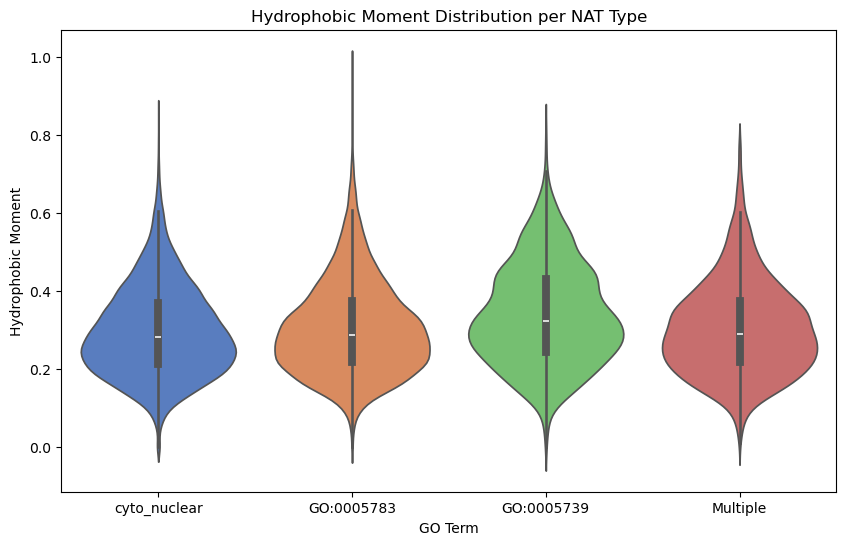

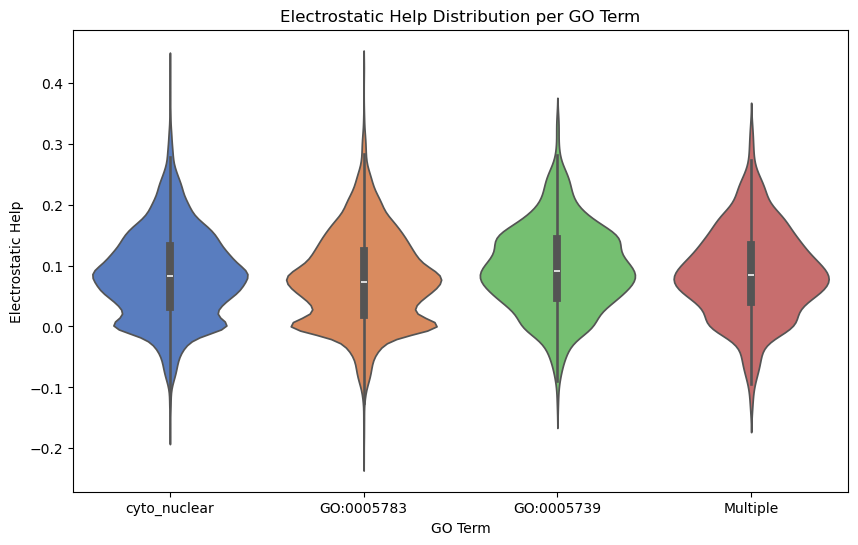

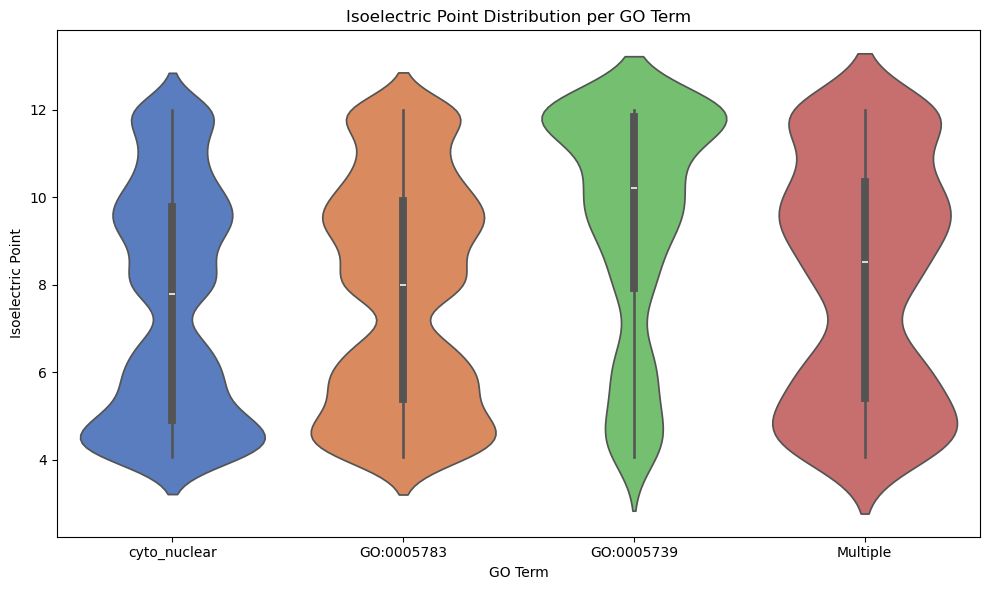

In [55]:
# Create a new dataframe with the NAT_Type column
nat_df = df[['protein_id', 'Hydrophobic Moment', 'Electrostatic Help', 'GO_Term', 'Isoelectric Point', 'Molecular Weight']].copy()
# Group by NAT_Type and calculate the mean for Hydrophobic_Moment and Electrostatic_Help
nat_means = nat_df.groupby('GO_Term')[['Hydrophobic Moment', 'Electrostatic Help', 'Isoelectric Point']].mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))
# Create a violin plot for Hydrophobic Moment
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Hydrophobic Moment'], ax=ax1, palette="muted")
ax1.set_xlabel('GO Term')
ax1.set_ylabel('Hydrophobic Moment')
ax1.set_title('Hydrophobic Moment Distribution per NAT Type')

# Create a violin plot for Electrostatic Help on a new figure
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Electrostatic Help'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Electrostatic Help')
ax2.set_title('Electrostatic Help Distribution per GO Term')

fig, ax2 = plt.subplots(figsize=(10, 6))
sns.violinplot(x=nat_df['GO_Term'], y=nat_df['Isoelectric Point'], ax=ax2, palette="muted")
ax2.set_xlabel('GO Term')
ax2.set_ylabel('Isoelectric Point')
ax2.set_title('Isoelectric Point Distribution per GO Term')

plt.tight_layout()
plt.show()



In [56]:
from scipy.stats import ttest_ind

# Optional: GO-Terme auswählen (z. B. Mitochondrium vs. cyto_nuclear)
group1 = 'GO:0005739'  # Mitochondrion
group2 = 'cyto_nuclear'  # referenz

# Filter Daten
group1_data = nat_df[nat_df['GO_Term'] == group1]['Hydrophobic Moment'].dropna()
group2_data = nat_df[nat_df['GO_Term'] == group2]['Hydrophobic Moment'].dropna()
print(f"Group 1 ({group1}) size: {len(group1_data)}")
print(f"Group 2 ({group2}) size: {len(group2_data)}")
# T-Test für Hydrophobic Moment
t_stat_hydro, p_val_hydro = ttest_ind(group1_data, group2_data, equal_var=True)  # Welch’s t-test
print(f"Hydrophobic Moment t-test ({group1} vs {group2}): t={t_stat_hydro:.3f}, p={p_val_hydro:.4f}")

# Dasselbe für Electrostatic Help
group1_electro = nat_df[nat_df['GO_Term'] == group1]['Electrostatic Help'].dropna()
group2_electro = nat_df[nat_df['GO_Term'] == group2]['Electrostatic Help'].dropna()

t_stat_elec, p_val_elec = ttest_ind(group1_electro, group2_electro, equal_var=True)
print(f"Electrostatic Help t-test ({group1} vs {group2}): t={t_stat_elec:.3f}, p={p_val_elec:.4f}")

# Dasselbe für Isoelectric Point
group1_weight = nat_df[nat_df['GO_Term'] == group1]['Isoelectric Point'].dropna()
group2_weight = nat_df[nat_df['GO_Term'] == group2]['Isoelectric Point'].dropna()

t_stat_weight, p_val_weight = ttest_ind(group1_weight, group2_weight, equal_var=True)
print(f"Isoelectric Point t-test ({group1} vs {group2}): t={t_stat_weight:.3f}, p={p_val_weight:.4f}")

# Dasselbe für Molecular Weight
group1_weight = nat_df[nat_df['GO_Term'] == group1]['Molecular Weight'].dropna()
group2_weight = nat_df[nat_df['GO_Term'] == group2]['Molecular Weight'].dropna()

t_stat_weight, p_val_weight = ttest_ind(group1_weight, group2_weight, equal_var=True)
print(f"Molecular Weight t-test ({group1} vs {group2}): t={t_stat_weight:.3f}, p={p_val_weight:.4f}")


Group 1 (GO:0005739) size: 1474
Group 2 (cyto_nuclear) size: 9726
Hydrophobic Moment t-test (GO:0005739 vs cyto_nuclear): t=13.100, p=0.0000
Electrostatic Help t-test (GO:0005739 vs cyto_nuclear): t=5.168, p=0.0000
Isoelectric Point t-test (GO:0005739 vs cyto_nuclear): t=26.026, p=0.0000
Molecular Weight t-test (GO:0005739 vs cyto_nuclear): t=-1.031, p=0.3027


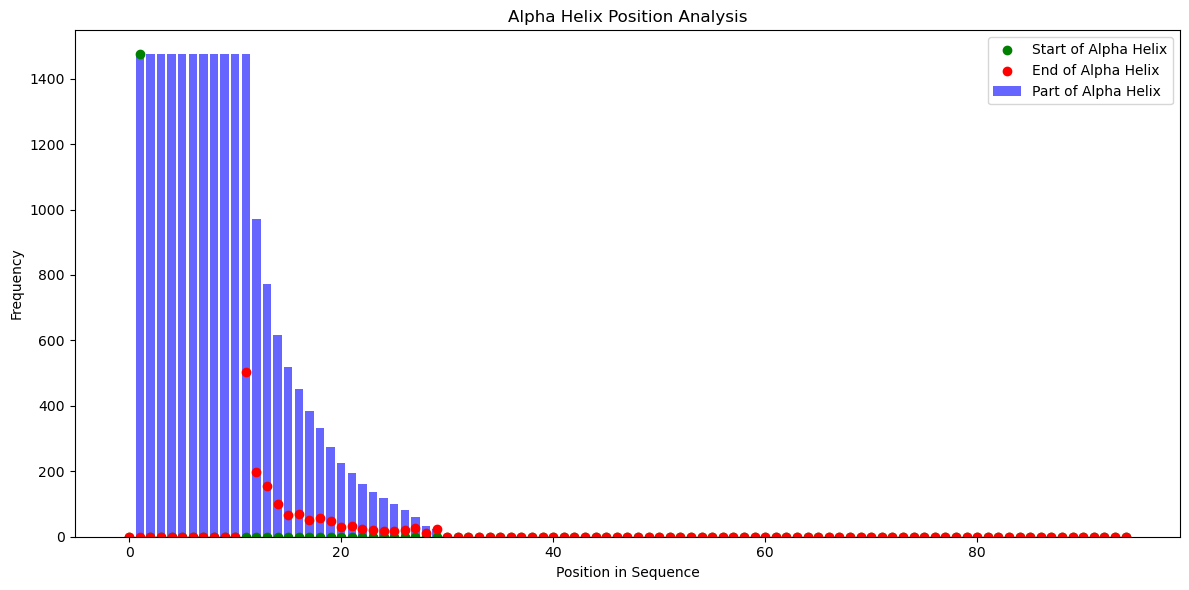

In [57]:
mito_df = df.copy()
mito_df = mito_df[(mito_df['GO_Term'] == "GO:0005739")]
sequence = mito_df['Sequence']
start_of_alpha_helix = mito_df['start_of_alpha_helix']
length_of_alpha_helix = mito_df['length_of_alpha_helix']
end_of_alpha_helix = start_of_alpha_helix + length_of_alpha_helix - 1
mito_df['end_of_alpha_helix'] = end_of_alpha_helix
# Count how often each position is part of an alpha helix
sequence_length = sequence.str.len().max()
position_counts = [0] * sequence_length
start_counts = [0] * sequence_length
end_counts = [0] * sequence_length

for start, end in zip(start_of_alpha_helix, end_of_alpha_helix):
    for pos in range(start, end + 1):
        if pos < sequence_length:
            position_counts[pos] += 1
    if start < sequence_length:
        start_counts[start] += 1
    if end < sequence_length:
        end_counts[end] += 1

# Plot the data
plt.figure(figsize=(12, 6))
positions = range(sequence_length)

# Blue histogram for positions part of an alpha helix
plt.bar(positions, position_counts, color='blue', alpha=0.6, label='Part of Alpha Helix')

# Green scatter plot for start of alpha helix
plt.scatter(positions, start_counts, color='green', label='Start of Alpha Helix')

# Red scatter plot for end of alpha helix
plt.scatter(positions, end_counts, color='red', label='End of Alpha Helix')

plt.xlabel('Position in Sequence')
plt.ylabel('Frequency')
plt.title('Alpha Helix Position Analysis')
plt.legend()
plt.tight_layout()
plt.show()